In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_haketon/20211022_수요예측_hackathon_data.csv', encoding='cp949')
#유니코드 에러: 한글조합코드로 인해 다운로드 안될때, 'euc-kr'또는 'cp949'로 인코딩 한다.

In [4]:
df.shape

(457067, 7)

In [5]:
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
0,울산광역시,남구,2019-09-29 21:25:40+00:00,2019-09-29 19:20:00+00:00,1,male,경형
1,울산광역시,남구,2019-07-13 13:11:21+00:00,2019-07-13 11:00:00+00:00,1,male,준중형
2,울산광역시,남구,2019-09-16 23:43:08+00:00,2019-09-16 19:10:00+00:00,1,male,준중형
3,울산광역시,남구,2019-08-09 06:17:41+00:00,2019-08-09 00:20:00+00:00,1,male,준중형
4,울산광역시,남구,2019-07-24 12:36:29+00:00,2019-07-24 09:00:00+00:00,2,male,경형


In [6]:
df.tail()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
457062,경기도,고양시 일산서구,2019-09-14 12:25:29+00:00,2019-09-14 12:00:00+00:00,1,male,경형
457063,경기도,고양시 일산서구,2019-07-25 15:30:00+00:00,2019-07-24 18:30:00+00:00,4,female,준중형
457064,경기도,고양시 일산서구,2019-07-14 22:38:09+00:00,2019-07-14 21:30:00+00:00,1,male,경형
457065,경기도,고양시 일산서구,2019-06-20 18:25:37+00:00,2019-06-20 18:10:00+00:00,1,unknown,소형SUV
457066,경기도,고양시 일산서구,2019-02-09 16:18:14+00:00,2019-02-09 12:40:00+00:00,3,male,중형


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457067 entries, 0 to 457066
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   region1                457067 non-null  object
 1   region2                457067 non-null  object
 2   reservation_return_at  457067 non-null  object
 3   reservation_start_at   457067 non-null  object
 4   age_group              457067 non-null  int64 
 5   gender                 457067 non-null  object
 6   car_model              457067 non-null  object
dtypes: int64(1), object(6)
memory usage: 24.4+ MB


In [8]:
df.isnull().sum()

region1                  0
region2                  0
reservation_return_at    0
reservation_start_at     0
age_group                0
gender                   0
car_model                0
dtype: int64

In [9]:
df['region1'].unique()

array(['울산광역시', '부산광역시', '경기도', '세종특별자치시', '전라북도'], dtype=object)

In [10]:
df['car_model'].unique()

array(['경형', '준중형', '준중형SUV', '소형SUV', '소형', '준대형', '중형', '중형SUV', '승합',
       '수입', '대형'], dtype=object)

In [11]:
print(df['age_group'].unique())


[1 2 4 3 5]


In [12]:
df['region2'].unique()

array(['남구', '동구', '북구', '중구', '강서구', '광명시', '구리시', '김포시', '세종시', '양평군',
       '울주군', '하남시', '화성시', '남양주시', '의정부시', '고양시\u3000덕양구',
       '성남시\u3000분당구', '성남시\u3000수정구', '성남시\u3000중원구', '안양시\u3000동안구',
       '안양시\u3000만안구', '전주시\u3000덕진구', '전주시\u3000완산구', '고양시\u3000일산동구',
       '고양시\u3000일산서구'], dtype=object)

In [13]:
df['age_group'] = df['age_group'].astype('object')
df['age_group'].dtypes

dtype('O')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457067 entries, 0 to 457066
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   region1                457067 non-null  object
 1   region2                457067 non-null  object
 2   reservation_return_at  457067 non-null  object
 3   reservation_start_at   457067 non-null  object
 4   age_group              457067 non-null  object
 5   gender                 457067 non-null  object
 6   car_model              457067 non-null  object
dtypes: object(7)
memory usage: 24.4+ MB


In [15]:
df['age_group'].describe() 

count     457067
unique         5
top            1
freq      271691
Name: age_group, dtype: int64

In [16]:
df.groupby(['region1'])['age_group'].describe()

,count,unique,top,freq
region1,,,,
경기도,356347,5,1,211437
부산광역시,10634,5,2,4183
세종특별자치시,15263,5,1,9847
울산광역시,47103,5,1,27711
전라북도,27720,5,1,19795


In [17]:
# df.pivot_table(index='age_group', columns='region2')
df.groupby(['region2'])['age_group'].describe()


,count,unique,top,freq
region2,,,,
강서구,10634,5,2,4183
고양시 덕양구,26253,5,1,15853
고양시 일산동구,31906,5,1,18088
고양시 일산서구,16052,5,1,8862
광명시,22645,5,1,11560
구리시,13011,5,1,8511
김포시,21500,5,1,11881
남구,21836,5,1,15901
남양주시,26546,5,1,16630


In [18]:
g2=df[df['region1']=='경기도']
g2

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
44105,경기도,광명시,2019-10-08 12:27:53+00:00,2019-10-07 19:30:00+00:00,1,male,소형SUV
44106,경기도,광명시,2019-05-14 12:50:00+00:00,2019-05-13 13:00:00+00:00,4,male,준중형SUV
44107,경기도,광명시,2019-01-11 17:14:14+00:00,2019-01-11 13:30:00+00:00,1,male,소형SUV
44108,경기도,광명시,2019-04-07 19:54:19+00:00,2019-04-07 10:30:00+00:00,3,female,소형SUV
44109,경기도,광명시,2019-09-20 22:47:39+00:00,2019-09-20 16:20:00+00:00,2,male,준중형
...,...,...,...,...,...,...,...
457062,경기도,고양시 일산서구,2019-09-14 12:25:29+00:00,2019-09-14 12:00:00+00:00,1,male,경형
457063,경기도,고양시 일산서구,2019-07-25 15:30:00+00:00,2019-07-24 18:30:00+00:00,4,female,준중형
457064,경기도,고양시 일산서구,2019-07-14 22:38:09+00:00,2019-07-14 21:30:00+00:00,1,male,경형
457065,경기도,고양시 일산서구,2019-06-20 18:25:37+00:00,2019-06-20 18:10:00+00:00,1,unknown,소형SUV


In [19]:
g2['region2'].nunique()

16

In [20]:
g2['region2'].unique()

array(['광명시', '구리시', '김포시', '양평군', '하남시', '화성시', '남양주시', '의정부시',
       '고양시\u3000덕양구', '성남시\u3000분당구', '성남시\u3000수정구', '성남시\u3000중원구',
       '안양시\u3000동안구', '안양시\u3000만안구', '고양시\u3000일산동구', '고양시\u3000일산서구'],
      dtype=object)

In [21]:
g_01=df[df['region2']=='광명시']
g_01.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
44105,경기도,광명시,2019-10-08 12:27:53+00:00,2019-10-07 19:30:00+00:00,1,male,소형SUV
44106,경기도,광명시,2019-05-14 12:50:00+00:00,2019-05-13 13:00:00+00:00,4,male,준중형SUV
44107,경기도,광명시,2019-01-11 17:14:14+00:00,2019-01-11 13:30:00+00:00,1,male,소형SUV
44108,경기도,광명시,2019-04-07 19:54:19+00:00,2019-04-07 10:30:00+00:00,3,female,소형SUV
44109,경기도,광명시,2019-09-20 22:47:39+00:00,2019-09-20 16:20:00+00:00,2,male,준중형


In [22]:
g_01["car_model"].unique()

array(['소형SUV', '준중형SUV', '준중형', '대형', '경형', '소형', '준대형', '중형', '승합',
       '중형SUV'], dtype=object)

In [23]:
ax01=g_01["car_model"].value_counts(sort=True)
ax01

경형        6925
준중형       6628
소형SUV     4567
준중형SUV    2070
중형         863
준대형        544
소형         436
중형SUV      329
승합         176
대형         107
Name: car_model, dtype: int64

In [24]:
g_02=df[df['region2']=='구리시']
g_02.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
66750,경기도,구리시,2019-09-13 23:08:25+00:00,2019-09-13 06:00:00+00:00,1,female,소형SUV


In [25]:
ax02=g_02["car_model"].value_counts(sort=True)
ax02

준중형       4685
경형        4586
소형SUV     1682
준중형SUV    1538
소형         368
수입          74
중형          49
승합          29
Name: car_model, dtype: int64

In [26]:
g_03=df[df['region2']=='김포시']
g_03.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
79761,경기도,김포시,2019-09-01 20:10:10+00:00,2019-09-01 13:30:00+00:00,1,female,경형


In [27]:
ax03=g_03["car_model"].value_counts(sort=True)
ax03

경형        7840
준중형       5121
소형SUV     4077
준중형SUV    1909
소형        1660
중형         660
승합         159
준대형         53
중형SUV       21
Name: car_model, dtype: int64

In [28]:
g_04=df[df['region2']=='양평군']
g_04.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
116524,경기도,양평군,2019-10-21 18:50:00+00:00,2019-10-21 18:10:00+00:00,1,male,경형


In [29]:
ax04=g_04["car_model"].value_counts(sort=True)
ax04

준중형       1099
소형SUV      787
경형         582
준중형SUV     250
소형         241
중형          28
Name: car_model, dtype: int64

In [30]:
g_05=df[df['region2']=='하남시']
g_05.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
133143,경기도,하남시,2019-05-03 07:45:29+00:00,2019-05-03 06:10:00+00:00,1,male,소형SUV


In [31]:
ax05=g_05["car_model"].value_counts(sort=True)
ax05

소형SUV     4687
준중형       3998
경형        2717
준중형SUV    1259
중형         477
소형         273
준대형         45
Name: car_model, dtype: int64

In [32]:
g_06=df[df['region2']=='화성시']
g_06.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
146599,경기도,화성시,2019-01-08 12:34:33+00:00,2019-01-07 12:00:00+00:00,1,male,소형SUV


In [33]:
ax06=g_06["car_model"].value_counts(sort=True)
ax06

준중형       10220
경형        10028
소형SUV      8386
준중형SUV     3712
중형         1159
소형          716
승합          468
준대형         421
수입          111
대형           28
Name: car_model, dtype: int64

In [34]:
g_07=df[df['region2']=='남양주시']
g_07.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
181848,경기도,남양주시,2019-02-26 18:35:01+00:00,2019-02-26 14:00:00+00:00,1,male,준중형


In [35]:
ax07=g_07["car_model"].value_counts(sort=True)
ax07

경형        8556
준중형       6994
소형SUV     6466
준중형SUV    2520
소형        1469
준대형        418
승합          85
중형          38
Name: car_model, dtype: int64

In [36]:
g_08=df[df['region2']=='의정부시']
g_08.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
208394,경기도,의정부시,2019-07-03 16:43:59+00:00,2019-07-03 09:30:00+00:00,3,male,소형SUV


In [37]:
ax08=g_08["car_model"].value_counts(sort=True)
ax08

준중형       8601
경형        7947
소형SUV     4205
준중형SUV    2988
소형         400
중형         319
준대형        278
승합         224
수입         169
중형SUV       70
대형          24
Name: car_model, dtype: int64

In [38]:
g_09=df[df['region2']=='고양시\u3000덕양구']
g_09.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
233619,경기도,고양시 덕양구,2019-07-19 00:53:41+00:00,2019-07-18 19:20:00+00:00,1,male,소형SUV


In [39]:
ax09=g_09["car_model"].value_counts(sort=True)
ax09

경형        8284
준중형       7329
소형SUV     5930
준중형SUV    2941
중형        1000
소형         546
승합         176
준대형         47
Name: car_model, dtype: int64

In [40]:
g_10=df[df['region2']=='성남시\u3000분당구']
g_10.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
259872,경기도,성남시 분당구,2019-10-02 12:07:23+00:00,2019-10-02 10:20:00+00:00,4,male,준중형


In [41]:
ax10=g_10["car_model"].value_counts(sort=True)
ax10

준중형       12936
소형SUV     11512
경형         9899
준중형SUV     5062
중형         2527
준대형        1445
수입          938
승합          920
소형          774
중형SUV       603
대형          166
Name: car_model, dtype: int64

In [42]:
g_11=df[df['region2']=='성남시\u3000수정구']
g_11.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
306654,경기도,성남시 수정구,2019-07-07 22:50:31+00:00,2019-07-07 18:10:00+00:00,1,male,소형


In [43]:
ax11=g_11["car_model"].value_counts(sort=True)
ax11

소형SUV     4803
경형        4779
준중형       4776
준중형SUV    2102
소형        1417
준대형        295
승합         266
중형SUV      117
중형         116
대형          88
수입          14
Name: car_model, dtype: int64

In [44]:
g_12=df[df['region2']=='성남시\u3000중원구']
g_12.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
325427,경기도,성남시 중원구,2019-05-11 02:22:20+00:00,2019-05-10 23:00:00+00:00,1,male,경형


In [45]:
ax12=g_12["car_model"].value_counts(sort=True)
ax12

경형        5403
준중형       3779
소형SUV     3469
준중형SUV    1449
중형         938
소형         758
중형SUV      399
준대형         29
승합          14
Name: car_model, dtype: int64

In [46]:
g_13=df[df['region2']=='안양시\u3000동안구']
g_13.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
341665,경기도,안양시 동안구,2019-10-15 20:41:13+00:00,2019-10-15 10:50:00+00:00,2,female,경형


In [47]:
ax13=g_13["car_model"].value_counts(sort=True)
ax13

경형        6255
준중형       5860
소형SUV     5559
준중형SUV    2267
중형         842
준대형        573
소형         486
중형SUV      456
수입         416
승합         204
Name: car_model, dtype: int64

In [48]:
g_14=df[df['region2']=='안양시\u3000만안구']
g_14.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
364583,경기도,안양시 만안구,2019-02-27 14:27:27+00:00,2019-02-27 13:00:00+00:00,3,male,경형


In [49]:
ax14=g_14["car_model"].value_counts(sort=True)
ax14

경형        5684
준중형       4349
소형SUV     3821
준중형SUV    1627
소형         533
중형         439
승합         156
준대형        125
중형SUV       72
Name: car_model, dtype: int64

In [50]:
g_15=df[df['region2']=='고양시\u3000일산동구']
g_15.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
409109,경기도,고양시 일산동구,2019-07-05 21:01:22+00:00,2019-07-05 06:40:00+00:00,4,female,중형


In [51]:
ax15=g_15["car_model"].value_counts(sort=True)
ax15

경형        10872
소형SUV      8712
준중형        6835
준중형SUV     2589
중형          867
소형          673
수입          393
준대형         386
승합          338
중형SUV       127
대형          114
Name: car_model, dtype: int64

In [52]:
g_16=df[df['region2']=='고양시\u3000일산서구']
g_16.head(1)

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model
441015,경기도,고양시 일산서구,2019-04-12 16:57:10+00:00,2019-04-12 09:00:00+00:00,3,male,경형


In [53]:
ax16=g_16["car_model"].value_counts(sort=True)
ax16

경형        7086
준중형       4146
소형SUV     2646
준중형SUV    1099
소형         420
승합         178
중형         164
중형SUV      161
준대형        152
Name: car_model, dtype: int64

In [ ]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [56]:
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [64]:
import seaborn as sns

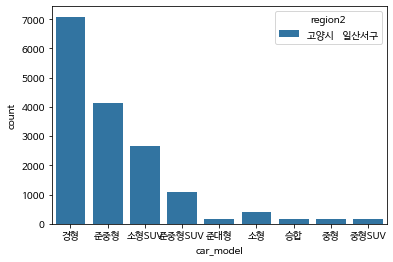

In [69]:
g16=sns.countplot(data=g_16, x="car_model", hue='region2')

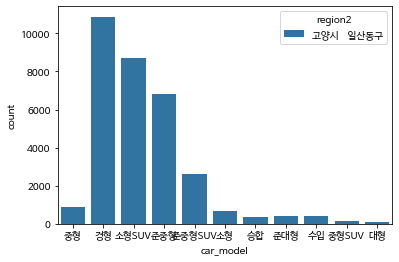

In [80]:
g15=sns.countplot(data=g_15, x="car_model", hue='region2')

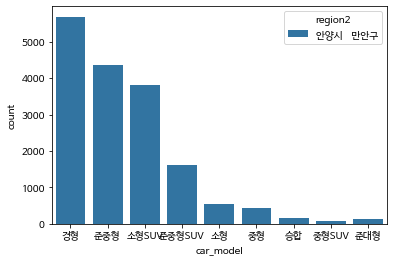

In [78]:
g14=sns.countplot(data=g_14, x="car_model", hue='region2')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


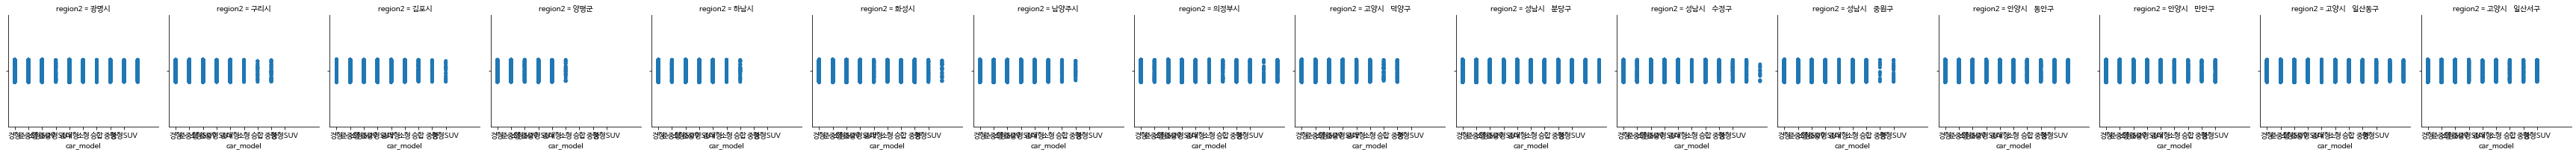

In [74]:
grid = sns.FacetGrid(data=g2, col='region2')
grid.map(sns.stripplot, "car_model")

In [81]:
sns.catplot(data=g2, x='car_model', kind='bar', col_wrap=4)

TypeError: ignored